In [12]:
# Function 1:  find the source of radiations in some square area. You can only detect the radiation once you are very close to it, 
# meaning most of the readings will be zero. There are two sources, one is not too dangerous, so make sure you try to find both modes of the function.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

X = np.load(r'C:\Users\stefa\Downloads\Python Assignment\initial_inputs.npy')
Y = np.load(r'C:\Users\stefa\Downloads\Python Assignment\initial_outputs.npy')
new_input = np.array([[0.648073, 0.683567], [0.000000, 0.999999], [0.999999, 0.999999], [0.000000, 0.707071], [0.999999, 0.000000], [0.717172, 0.000000]])
X = np.vstack((X, new_input))
new_output = np.array([[-0.003576], [0.000000], [0.0000000], [0.0000000], [0.0000000], [0.0000000]])
Y = np.vstack((Y.reshape(-1,1), new_output.reshape(-1,1)))



In [3]:
X

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397],
       [0.648073  , 0.683567  ],
       [0.        , 0.999999  ],
       [0.999999  , 0.999999  ],
       [0.        , 0.707071  ],
       [0.999999  , 0.        ],
       [0.717172  , 0.        ]])

In [7]:
Y

array([[ 1.32267704e-079],
       [ 1.03307824e-046],
       [ 7.71087511e-016],
       [ 3.34177101e-124],
       [-3.60606264e-003],
       [-2.15924904e-054],
       [-2.08909327e-091],
       [ 2.53500115e-040],
       [ 3.60677119e-081],
       [ 6.22985647e-048],
       [-3.57600000e-003],
       [ 0.00000000e+000],
       [ 0.00000000e+000],
       [ 0.00000000e+000],
       [ 0.00000000e+000],
       [ 0.00000000e+000]])

In [14]:
# Using Bayesian OPtimisation and consider an Upper COnfidence Bound acquisition function

#Surrogate Model: A probabilistic model (often a Gaussian Process) that approximates the objective function.
gpr = GaussianProcessRegressor() # Surrogate Model
gpr.fit(X, Y)

GaussianProcessRegressor()

In [6]:
# to optimize the acquisition function, we will simply use gridsearch over a space of 10,000 gridpoints
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

In [8]:
X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

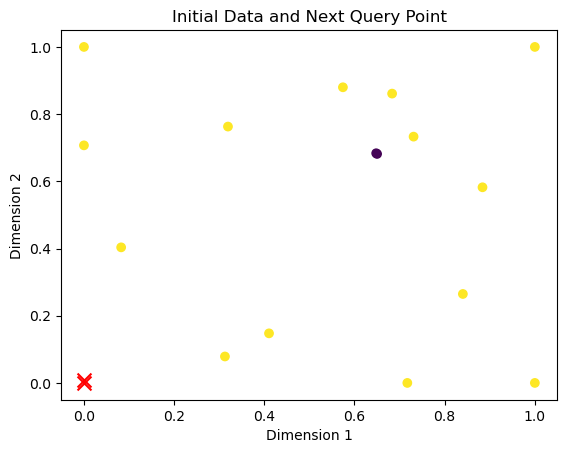

In [16]:
# Visualize (optional)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.scatter(X_grid[0], X_grid[1], marker='x', color='red', s=100)
plt.title("Initial Data and Next Query Point")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

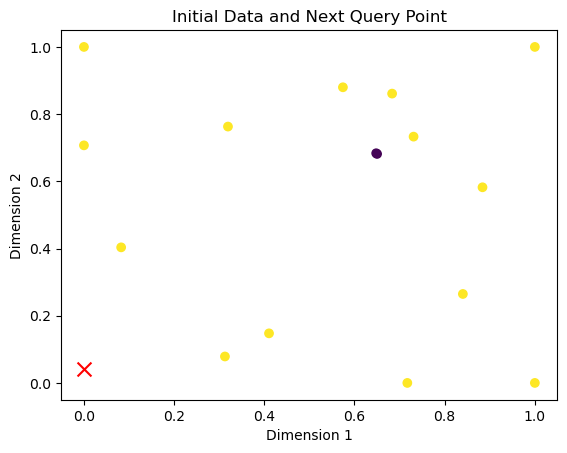

Next Query Point: 0.000000-0.040404


In [18]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt



# Instantiate GPR model
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# Define grid of points
x1 = np.linspace(0, 1, 100)  # Assuming the search space is within [0, 1] for both dimensions
x2 = np.linspace(0, 1, 100)
X_grid = np.array(np.meshgrid(x1, x2)).reshape(2, -1).T

# Predict with GPR
mean, std = gpr.predict(X_grid, return_std=True)

# Calculate UCB
exploration_factor = 1.96
ucb = mean + exploration_factor * std

# Select next query point
next_query = X_grid[np.argmax(ucb)]

# Visualize (optional)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.scatter(next_query[0], next_query[1], marker='x', color='red', s=100)
plt.title("Initial Data and Next Query Point")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# print("Next Query Point:", next_query)
# Format the next query point as requested
formatted_next_query = f"{next_query[0]:.6f}-{next_query[1]:.6f}"

print("Next Query Point:", formatted_next_query)
# END of Function 1

In [20]:
# Function 2: This corresponds to trying to optimise an unknown machine learning model. However, the initialization of the model is very important, 
# meaning your observations will be very noisy, and the problem might have a lot of local optima! You are trying to make the model’s log-likelihood 
# as large as possible.

import numpy as np
import pandas as pd

X = np.load('initial_inputs2.npy')
Y = np.load('initial_outputs2.npy')
new_inputs = np.array([[0.747016, 0.91993], [0.777218, 0.999999], [0.768329, 0.899479], [0.693310, 0.183019], [0.812662, 0.136619], 
                       [0.63422457, 0.17946113]])
    
X = np.vstack((X, new_inputs))

new_outputs = np.array([0.535256, 0.298375, 0.235805, 0.573117, -0.008346, 0.243926])
Y = np.vstack((Y.reshape(-1,1), new_outputs.reshape(-1,1)))



In [22]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
from sklearn.preprocessing import StandardScaler



# Using Bayesian OPtimisation and consider an Upper COnfidence Bound acquisition function

#Surrogate Model: A probabilistic model (often a Gaussian Process) that approximates the objective function.
gpr = GaussianProcessRegressor() # Surrogate Model
gpr.fit(X, Y)

GaussianProcessRegressor()

In [24]:
# to optimize the acquisition function, we will simply use gridsearch over a space of 10,000 gridpoints
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

In [ ]:
X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

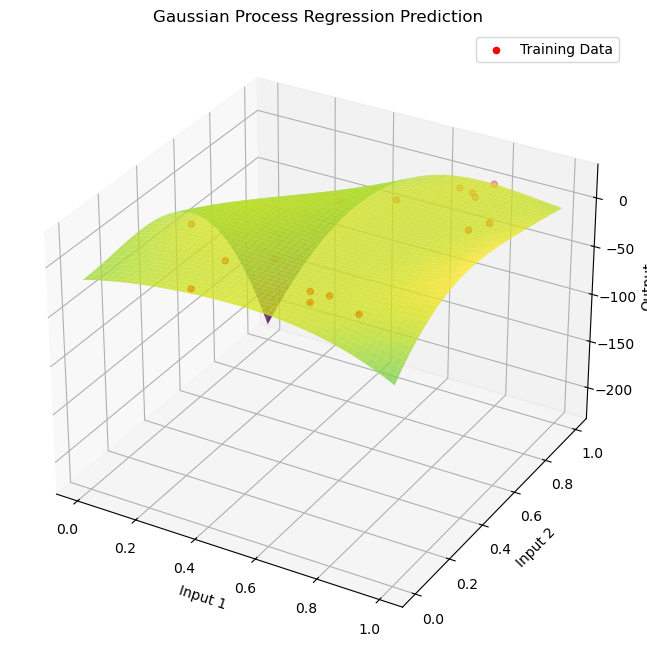

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor

# ... your existing code to load data and train gpr ...

X_grid = np.array(X_grid) #Convert X_grid to a NumPy array for easier handling

try:
    # Predict on the grid
    Y_grid, sigma = gpr.predict(X_grid, return_std=True)

    # Reshape for plotting
    x1 = X_grid[:, 0].reshape(100, 100)
    x2 = X_grid[:, 1].reshape(100, 100)
    Y_grid = Y_grid.reshape(100, 100)
    sigma = sigma.reshape(100,100)


    # Create the 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1, x2, Y_grid, cmap='viridis', alpha=0.8) #Plot the surface 
    ax.scatter(X[:,0],X[:,1],Y, c='r', marker='o', label='Training Data') #Add training points
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.set_zlabel('Output')
    ax.set_title('Gaussian Process Regression Prediction')
    ax.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred during plotting: {e}")
    print("Possible causes: issues with gpr.predict, incorrect data shapes, or plotting library issues.")

Next suggested point (EI): [0.65059019 0.99166618]


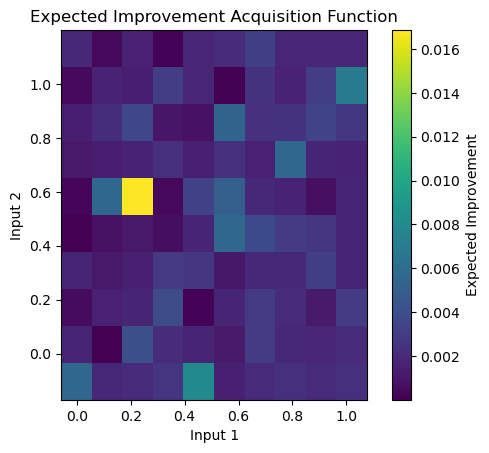

In [28]:
import numpy as np
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
#from sklearn.preprocessing import StandardScaler # Removed
import matplotlib.pyplot as plt
from matplotlib import cm

kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, nu=1.5, length_scale_bounds=(1e-2, 1e2)) 
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, n_restarts_optimizer=20)
gp.fit(X, Y.ravel()) # Use unscaled X and Y


def expected_improvement(x, gp, xi=0.01):
    mu, sigma = gp.predict(x.reshape(1, -1), return_std=True)
    mu_best = np.max(gp.predict(X)) # Use unscaled X
    with np.errstate(divide='ignore'):
        Z = (mu - mu_best - xi) / sigma
        ei = (mu - mu_best - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

num_samples = 100
x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2  # Use unscaled X
x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2  # Use unscaled X
x1_samples = np.random.uniform(x1_min, x1_max, num_samples)
x2_samples = np.random.uniform(x2_min, x2_max, num_samples)
X_samples = np.column_stack((x1_samples, x2_samples)) #Removed _scaled

ei_values = np.array([expected_improvement(x, gp) for x in X_samples])
best_index = np.argmax(ei_values)
best_x = X_samples[best_index] # No need for inverse transform
print(f"Next suggested point (EI): {best_x}")

ei_plot = ei_values.reshape(int(np.sqrt(num_samples)), int(np.sqrt(num_samples)))
plt.imshow(ei_plot, extent=[x1_min, x1_max, x2_min, x2_max], origin='lower', cmap=cm.viridis)
plt.colorbar(label='Expected Improvement')
plt.xlabel('Input 1') # Changed label
plt.ylabel('Input 2') # Changed label
plt.title('Expected Improvement Acquisition Function')
plt.show()

In [ ]:
# End of Funtion 2

In [38]:
#Function 3: In this example, you are doing drug discovery! You can select three compounds to create a drug, and receive a measurement of the people’s 
# adverse reaction to the drug. You want to make this as close as possible to zero. (hint: one of the variables may not cause any effects on the person).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

X = np.load('initial_inputs3.npy')
Y = np.load('initial_outputs3.npy')

new_inputs = np.array([[0.00000000, 0.999999, 0.00000000],[0.965995, 0.219917, 0.710632], [0.965995, 0.999999, 0.990882], [0.965995, 0.999999, 0.      ], [0.419574, 0.999999, 0.999999], 
                       [0.965995, 0.219917, 0.000000]]).reshape(6,3)
X= np.concatenate((X, new_inputs), axis=0)

new_outputs = np.array([-0.149916, -34.101907, -0.447783, -0.148082, -31.789738, -0.146879])
Y = np.vstack((Y.reshape(-1,1), new_outputs.reshape(-1,1)))

In [40]:
# Using Bayesian OPtimisation and consider an Upper COnfidence Bound acquisition function

#Surrogate Model: A probabilistic model (often a Gaussian Process) that approximates the objective function.
gpr = GaussianProcessRegressor() # Surrogate Model
gpr.fit(X, Y)

GaussianProcessRegressor()

In [42]:
# to optimize the acquisition function, we will simply use gridsearch over a space of 10,000 gridpoints
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

In [44]:
X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

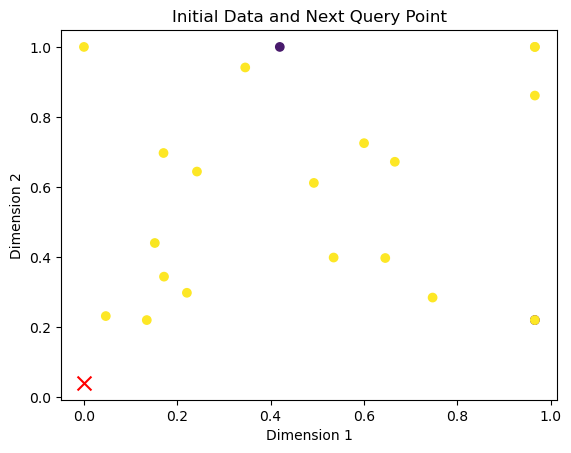

In [46]:
# Visualize (optional)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.scatter(next_query[0], next_query[1], marker='x', color='red', s=100)
plt.title("Initial Data and Next Query Point")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

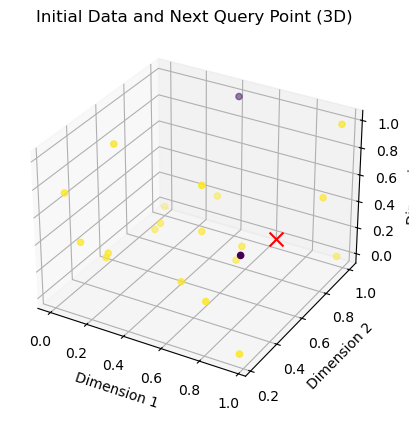

Next Query Point: 0.634239-0.999999-0.000000


In [48]:
# Try Expected improvement and see the difference
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Import for 3D plotting


# Assuming X and Y are already defined and loaded (3D X and 1D Y)

# Instantiate GPR model
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# Define grid of points (3D grid)
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)  
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x3 = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)
x1, x2, x3 = np.meshgrid(x1, x2, x3)
X_grid = np.column_stack((x1.ravel(), x2.ravel(), x3.ravel()))


# Predict with GPR
mean, std = gpr.predict(X_grid, return_std=True)

# Calculate UCB
exploration_factor = 1.96
ucb = mean + exploration_factor * std

# Select next query point
next_query_index = np.argmax(ucb)
next_query = X_grid[next_query_index]


# Visualization (3D scatter plot - challenging with 3 dimensions)
#Because visualizing 3D data with a third dimension (the output) is very difficult in a scatter plot. We will show only two dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='viridis')
ax.scatter(next_query[0], next_query[1], next_query[2], marker='x', color='red', s=100)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.set_title("Initial Data and Next Query Point (3D)")
plt.show()


# Format the next query point
formatted_next_query = f"{next_query[0]:.6f}-{next_query[1]:.6f}-{next_query[2]:.6f}"
print("Next Query Point:", formatted_next_query)

In [ ]:
# End of Function 3


In [50]:
# Function 4: his example is for a particular business relying heavily on online sales. It can run very accurate calculations to figure out what is 
# the optimal placement of their product across warehouses. Unfortunately, the calculations are extremely expensive (computationally) to run, 
# so they can only do it once every two weeks. Instead, they propose using a machine learning model which approximates the solution quickly 
# (in a few hours). The model has four hyper-parameters you need to tune, and the output corresponds to the difference between the expensive 
# calculation, and the model. Since you are modelling a dynamical system, expect a lot of local optima!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import norm
# Generate synthetic data
X = np.load('initial_inputs4.npy')
Y = np.load('initial_outputs4.npy')

new_inputs = np.array([[0.47368421, 0.52631579, 0.36842105, 0.47368421],[0.985622, 0.053088, 0.939178, 0.081517], [0.037825, 0.919592, 0.514287, 0.564657], 
                       [0.037825, 0.00625 , 0.514287, 0.999483], [0.985622, 0.193603, 0.939178, 0.081517], [0.037825, 0.919592, 0.042186, 0.612971]]).reshape(6,4)
                       
X = np.concatenate((X, new_inputs), axis=0)

new_outputs = np.array([-15.29473508606819, -34.1019076180882, -20.87072150558431, -27.41198441505824, -31.7897389959, -24.8580937])
y = np.vstack((Y.reshape(-1,1), new_outputs.reshape(-1,1)))

In [52]:
# Suggested for creating Grids
import numpy as np

# Define the number of points per dimension and the number of dimensions
points_per_dimension = 4
dimensions = 4

# Create a list of linspace arrays for each dimension
grid_points = [np.linspace(0.000001, 0.999999, points_per_dimension) for _ in range(dimensions)]

# Use itertools.product to generate the grid points on demand
from itertools import product
X_grid = np.array(list(product(*grid_points)))

print(X_grid.shape)

(256, 4)


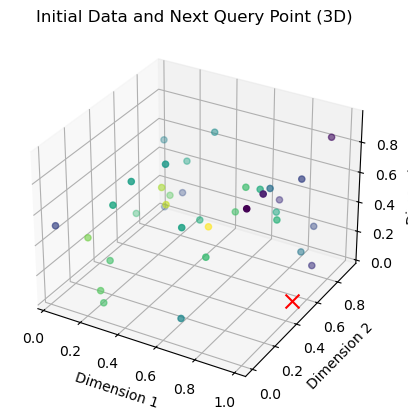

Next Query Point: 0.985622-0.486956-0.042186-0.081517


In [54]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Import for 3D plotting


# Assuming X and Y are already defined and loaded (3D X and 1D Y)

# Instantiate GPR model
gpr = GaussianProcessRegressor()
gpr.fit(X, y)

# Define grid of points (3D grid)
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)  
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x3 = np.linspace(X[:, 2].min(), X[:, 2].max(), 20)
x4 = np.linspace(X[:, 3].min(), X[:, 3].max(), 20)
x1, x2, x3, x4 = np.meshgrid(x1, x2, x3, x4)
X_grid = np.column_stack((x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel()))


# Predict with GPR
mean, std = gpr.predict(X_grid, return_std=True)

# Calculate UCB
exploration_factor = 1.96
ucb = mean + exploration_factor * std

# Select next query point
next_query_index = np.argmax(ucb)
next_query = X_grid[next_query_index]


# Visualization (3D scatter plot - challenging with 3 dimensions)
#Because visualizing 3D data with a third dimension (the output) is very difficult in a scatter plot. We will show only two dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],  c=y, cmap='viridis')
ax.scatter(next_query[0], next_query[1], next_query[2], marker='x', color='red', s=100)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

ax.set_title("Initial Data and Next Query Point (3D)")
plt.show()


# Format the next query point
formatted_next_query = f"{next_query[0]:.6f}-{next_query[1]:.6f}-{next_query[2]:.6f}-{next_query[3]:.6f}"
print("Next Query Point:", formatted_next_query)

In [ ]:
# End of Function 4

In [58]:
# Function 5: This time you are trying to optimise another four-dimensional black-box. It corresponds to the yield of a chemical process after processing 
# in some factory. This type of process tends to be unimodal. Try to find the combination of chemicals that maximizes the yield!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import norm
file_path1 = r'C:\Users\stefa\Downloads\initial_inputs5.npy'
X = np.load('initial_inputs5.npy')
new_inputs = np.array([
    [0.22418902, 0.84648049, 0.87948418, 0.87851568],
    [0.836478, 0.038193, 0.879484, 0.07288],
    [0.723331, 0.86254 , 0.879484, 0.957644],
    [0.836478, 0.862540, 0.879484, 0.957644],
    [1.000000, 1.000000, 1.000000, 1.000000]
])
X = np.vstack((X, new_inputs))
Y = np.load('initial_outputs5.npy')

new_outputs = np.array([1088.8535114737463, 268.644909634008, 2284.771102735018, 2860.6448644329735, 8662.405001248297])
Y = np.vstack((Y.reshape(-1,1), new_outputs.reshape(-1,1)))

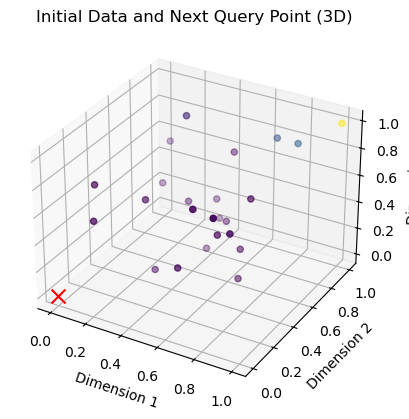

Next Query Point: 0.000000-0.000000-0.000000-0.489796


In [60]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Import for 3D plotting


# Assuming X and Y are already defined and loaded (3D X and 1D Y)

# Instantiate GPR model
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# Define grid of points (3D grid)
x1 = np.linspace(0, 1, 50) 
x2 = np.linspace(0, 1, 50)
x3 = np.linspace(0, 1, 50)
x4 = np.linspace(0, 1, 50)
X_grid = np.array(np.meshgrid(x1, x2, x3, x4)).reshape(4, -1).T


# Predict with GPR
mean, std = gpr.predict(X, return_std=True)

# Calculate UCB
exploration_factor = 1.96
ucb = mean + exploration_factor * std

# Select next query point
next_query_index = np.argmax(ucb)
next_query = X_grid[next_query_index]


# Visualization (3D scatter plot - challenging with 3 dimensions)
#Because visualizing 3D data with a third dimension (the output) is very difficult in a scatter plot. We will show only two dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],  c=Y, cmap='viridis')
ax.scatter(next_query[0], next_query[1], next_query[2], marker='x', color='red', s=100)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

ax.set_title("Initial Data and Next Query Point (3D)")
plt.show()


# Format the next query point
formatted_next_query = f"{next_query[0]:.6f}-{next_query[1]:.6f}-{next_query[2]:.6f}-{next_query[3]:.6f}"
print("Next Query Point:", formatted_next_query)


In [ ]:
# End of Function 5

In [62]:
# Function 6: Time to get cooking! You are optimising a cake recipe. There are five ingredients. The outputs correspond to the sum of different 
# objectives: flavor, consistency, calories, waste and cost. Each objective receives negative points by our expert taster. 
# You want this sum to be as close to zero as possible!

import numpy as np
import pandas as pd

X = np.load('initial_inputs6.npy')
Y = np.load('initial_outputs6.npy')
new_inputs = np.array([[0.7281861, 0.15469257, 0.73255167, 0.69399651, 0.05640131], [0.728161, 0.154692, 0.732551, 0.693996, 0.056401], 
                       [0.986645, 0.507464, 0.083497, 0.756081, 0.790302], [0.940014, 0.925821, 0.824603, 0.998827, 0.148472], 
                       [0.519504, 0.943304, 0.693007, 0.411674, 0.896559], [0.569484, 0.630122, 0.87503 , 0.900737, 0.814217]]).reshape(6,5)
X = np.concatenate((X, new_inputs), axis=0)


new_outputs = np.array([-0.6631580622340227, -0.7905694015438298, -1.9305471309355715, -1.5108466697794383, -1.9161356700687644, -1.5318341406964642])
Y = np.vstack((Y.reshape(-1,1), new_outputs.reshape(-1,1)))

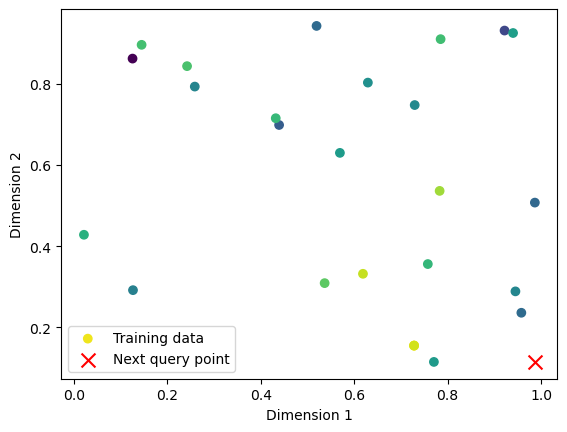

Next Query Point: 0.986645-0.114404-0.978806-0.308569-0.004911


In [64]:
# Maximisation of the function

import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Import for 3D plotting


# Assuming X (4D) and y (1D) are already defined and loaded

# Instantiate GPR model
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# Define grid of points (4D grid)
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
x3 = np.linspace(X[:, 2].min(), X[:, 2].max(), 30)
x4 = np.linspace(X[:, 3].min(), X[:, 3].max(), 30)
x5 = np.linspace(X[:, 4].min(), X[:, 4].max(), 30)
x1, x2, x3, x4, x5 = np.meshgrid(x1, x2, x3, x4, x5)
X_grid = np.column_stack((x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel(), x5.ravel()))

# Predict with GPR
mean, std = gpr.predict(X_grid, return_std=True)

# Calculate UCB
exploration_factor = 1.96
ucb = mean + exploration_factor * std

# Select next query point
next_query_index = np.argmax(ucb)
next_query = X_grid[next_query_index]

# Visualization (challenging with 4D data; consider 2D or 3D slices)
#Plot a 2D slice
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=Y, cmap='viridis', label='Training data')
ax.scatter(next_query[0], next_query[1], marker='x', color='red', s=100, label='Next query point')
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.legend()
plt.show()



# Format the next query point
formatted_next_query = f"{next_query[0]:.6f}-{next_query[1]:.6f}-{next_query[2]:.6f}-{next_query[3]:.6f}-{next_query[4]:.6f}"
print("Next Query Point:", formatted_next_query)

In [ ]:
# End of Function 6


In [68]:
# Function 7: You are now optimising six hyper-parameters of a machine learning model. Note that it is a popular and frequently used model, 
# so maybe you could search to see if anyone else has optisized it before?

import numpy as np
import pandas as pd
X = np.load('initial_inputs7.npy')
new_inputs = np.array([[0.05789554, 0.49167222, 0.24742222, 0.21811844, 0.42042833, 0.73096984], [0.442965, 0.1881  , 0.521096, 0.647544, 0.171446, 0.670979], 
                       [0.456069, 0.785175, 0.199673, 0.514234, 0.592414, 0.04645 ], [0.456069, 0.785175, 0.199673, 0.514234, 0.592414, 0.04645 ], 
                       [0.611852, 0.139493, 0.292144, 0.366361, 0.456069, 0.785175], [0.654376, 0.512333, 0.787158, 0.431658, 0.090793, 0.54446 ]]).reshape(6,6)
X = np.concatenate((X, new_inputs), axis=0)

Y = np.load('initial_outputs7.npy')
new_outputs = np.array([1.3649701201904285, 0.57812492250181, 2.6134989965095765, 2.613498996509576, 1.1170672690046661, 0.3363980624383745])
Y = np.vstack((Y.reshape(-1,1), new_outputs.reshape(-1,1)))

In [70]:
def generate_nd_grid(max_points, dimensions):
    # define range for input
	r_min, r_max = 0, 1.0

	# generate a random sample from the domain (dimensions)
	nd_grid = r_min + np.random.rand(max_points, dimensions) * (r_max - r_min)
	
	return np.array(nd_grid)

In [72]:
max_points = 800000
dimensions = 6  # Change this to the desired number of dimensions
X_grid = []
X_grid = generate_nd_grid(max_points, dimensions)
X_grid

array([[0.16958345, 0.68800166, 0.34160188, 0.88512829, 0.60204633,
        0.31478646],
       [0.88876793, 0.42385283, 0.9518226 , 0.5931111 , 0.22951321,
        0.72084128],
       [0.58705289, 0.89275235, 0.46861056, 0.42503406, 0.610145  ,
        0.82080825],
       ...,
       [0.50705128, 0.06343935, 0.21442197, 0.0598028 , 0.41108521,
        0.25889569],
       [0.27512203, 0.11569195, 0.31486907, 0.1776993 , 0.38989607,
        0.53414664],
       [0.00825235, 0.0625986 , 0.24609964, 0.23488166, 0.46312068,
        0.83711095]])

In [74]:
# 1. Build a Gaussian Process model (This model will be fixed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, WhiteKernel, ConstantKernel 
from scipy.optimize import minimize
from scipy.stats.qmc import LatinHypercube
from scipy.stats import uniform, loguniform, norm
from sklearn.model_selection import RandomizedSearchCV
from mpl_toolkits.mplot3d import Axes3D
import itertools  # Import the itertools module

kernel = ConstantKernel(1.0) * RBF(1.0)  
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10) 
gp.fit(X, Y)  # Train the model initially
 
# 2. Define the acquisition function (Expected Improvement)
def expected_improvement(x, gp, xi=0.01):
    mu, sigma = gp.predict(x.reshape(1, -1), return_std=True) 
    mu_sample_opt = np.max(gp.predict(gp.X_train_)) 
    with np.errstate(divide='warn'):
        imp = mu - mu_sample_opt - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei
 
# 3. Find the next point to evaluate
next_point = minimize(lambda x: -expected_improvement(x, gp), 
                     x0=np.random.uniform(0, 1, size=6), 
                     bounds=[(0, 1)] * 6).x
 
print("Next point to evaluate:", next_point)

C:\Users\stefa\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Next point to evaluate: [0.87351949 0.56040651 0.67473118 0.3153638  0.49263628 0.98041314]


In [ ]:
# End of Function 7


In [76]:
import numpy as np
import pandas as pd

X = np.load('initial_inputs8.npy')
new_input = np.array([[0.05644741, 0.06595555, 0.02292868, 0.03878647, 0.40393544, 0.80105533, 0.48830701, 0.89308498],[0.055447, 0.064955, 0.021928, 0.038786, 0.403935, 0.801055,
       0.488307, 0.893084], [3.70000e-05, 3.18466e-01, 5.12112e-01, 1.84432e-01, 7.92502e-01,
       5.06408e-01, 5.95801e-01, 3.21668e-01], [0.313752, 0.394435, 0.070377, 0.296254, 0.540349, 0.937856,
       0.622166, 0.048756], [0.132814, 0.224892, 0.067363, 0.183726, 0.61147 , 0.504524,
       0.153205, 0.644985], [0.101001, 0.360725, 0.092649, 0.302627, 0.4447  , 0.642132,
       0.263725, 0.606618]]).reshape(6,8)
 
X = np.concatenate((X, new_input), axis=0) # axis=0 adds the new row at the end
Y = np.load('initial_outputs8.npy')

new_output = np.array([[9.5984813862679], [9.5974906522679], [9.1912867939596], [9.2045543013619], [9.9569558906625], [9.8366659961746]])
Y = np.append(Y, [new_output])

In [78]:
def generate_nd_grid(max_points, dimensions):
    # define range for input
	r_min, r_max = 0, 1.0

	# generate a random sample from the domain (dimensions)
	nd_grid = r_min + np.random.rand(max_points, dimensions) * (r_max - r_min)
	
	return np.array(nd_grid)

In [80]:
max_points = 800000
dimensions = 8  # Change this to the desired number of dimensions
X_grid = []
X_grid = generate_nd_grid(max_points, dimensions)
X_grid

array([[0.78685403, 0.4949978 , 0.14073472, ..., 0.12530434, 0.33927558,
        0.0569141 ],
       [0.78082193, 0.58191456, 0.58282626, ..., 0.82042217, 0.47921389,
        0.3786529 ],
       [0.2303928 , 0.80841952, 0.41027218, ..., 0.67130494, 0.20478669,
        0.52638036],
       ...,
       [0.8372734 , 0.35135064, 0.48175726, ..., 0.92696943, 0.74793229,
        0.69878687],
       [0.31355697, 0.4435789 , 0.16779052, ..., 0.55157355, 0.88948887,
        0.77337413],
       [0.26063109, 0.81393348, 0.53108599, ..., 0.61593267, 0.87715299,
        0.16856924]])

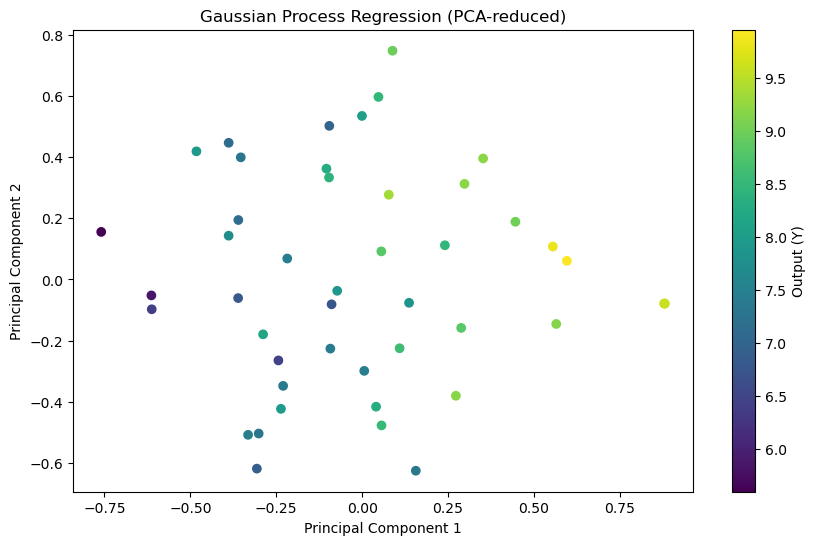

Best next point: [0.15545366 0.11987355 0.09998911 0.1139039  0.59094887 0.27251169
 0.19902086 0.37336755]


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm

# ... (Your X and Y data remains the same) ...

# Create a GPR model (no change here)
kernel = RBF(length_scale=1.0)  # You may need to adjust kernel and length scale
gpr = GaussianProcessRegressor(kernel=kernel)

# Correctly fit the GPR model with all 8 dimensions
gpr.fit(X, Y)

#For visualization, we'll use PCA to reduce to 2 dimensions for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y, cmap='viridis')  #Color points by Y value
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gaussian Process Regression (PCA-reduced)')
plt.colorbar(label='Output (Y)')
plt.show()


def upper_confidence_bound(X_grid, gpr, beta):
    """
    Computes the Upper Confidence Bound (UCB) acquisition function for maximization.

    Args:
        X: Input points (array-like).
        gpr: Trained Gaussian Process Regressor.
        beta: Exploration-exploitation parameter (higher beta means more exploration).

    Returns:
        UCB value for each input point (array-like).
    """
    mu, sigma = gpr.predict(X_grid, return_std=True)
    return mu + beta * sigma

# Example usage (assuming 'gpr' is your trained GPR model):




# Calculate UCB for these points (adjust beta as needed)
beta = 2.0  # exploration-exploitation tradeoff
ucb_values = upper_confidence_bound(X_grid, gpr, beta)

# Find the point with the highest UCB (most promising)
best_next_point = X_grid[np.argmax(ucb_values)]

print("Best next point:", best_next_point)